# Отчет HR-подразделений
1. [Письмо - ТЗ от компании](#A)
2. [Сведения о данных](#B)
3. [Общие сведения по компании](#C)
4. [Взаимосвязи между полом, возрастом, отделом и другими переменными с увольнением сотрудников](#D)
5. [Анализ данных согласно ТЗ от компании](#E)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('Employee-Attrition.csv')

## Письмо - ТЗ от компании: <a id="A"></a>
- Насколько сотрудники удовлетворены работой в компании (ответ на вопрос EnvironmentSatisfaction). И какие факторы влияют на удовлетворенность (только ли зарплата? может еще и образование, что-то еще?).
- Как позиция(JobLevel)/доход и подразделение влияют на WorkLifeBalance?
- Как отношения на работе (RelationshipSatisfaction) зависят от подразделения и EnvironmentSatisfaction?
- Как вообще различается удовлетворенность в разных подразделениях? А в грейдах?
Но, возможно, у вас есть свое видение как оценить удовлетворенность работой?

## Сведения о данных <a id="B"></a>

1. Age : Возраст;
2. Attrition : Увольнение (да, нет);
3. BusinessTravel : Деловые Поездки (путешествует редко или часто);
4. DailyRate : Дневная норма;
5. Department : Подразделение,
6. DistanceFromHome : Расстояние до дома
7. Education : Образование (1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor');
8. EducationField : Сфера образования;
9. EmployeeCount : Количество сотрудников;
10. EmployeeNumber : Номер сотрудника;
11. EnvironmentSatisfaction : Удовлетворенность работой в компании (1 'Low', 2 'Medium', 3 'High', 4 'Very High');
12. Gender : Пол;
13. HourlyRate : Почасовая ставка;
14. JobInvolvement: Участие в работе (1 'Low', 2 'Medium', 3 'High', 4 'Very High'); 
15. JobLevel : Уровень работы; 
16. JobRole : Должность;
17. JobSatisfaction : Удовлетворенность работой (1 'Low', 2 'Medium', 3 'High', 4 'Very High');
18. MaritalStatus : Семейное положение; 
19. MonthlyIncome : Ежемесячный доход;
20. MonthlyRate : Месячная ставка; 
21. NumCompaniesWorked : Количество мест работы сотрудника;
22. Over18 : Старше 18 лет; 
23. OverTime : Сверхурочные; 
24. PercentSalaryHike : Процентная ставка;  
25. PerformanceRating : Оценка производительности (1 'Low', 2 'Medium', 3 'High', 4 'Very High');
26. RelationshipSatisfaction : Удовлетворенность отношением (1 'Low', 2 'Medium', 3 'High', 4 'Very High');
27. StandardHours :  Стандартные часы работы;
28. StockOptionLevel : Опционы;
29. TotalWorkingYears : Общий трудовой стаж;
30. TrainingTimesLastYear : Время обучения - последний год; 
31. WorkLifeBalance : Баланс Между Работой и Личной жизнью (1 'Low', 2 'Medium', 3 'High', 4 'Very High');
32. YearsAtCompany : Стаж работы в компании;
33. YearsInCurrentRole : Стаж работы в компании в должности; 
34. YearsSinceLastPromotion : Годы с момента последней акции
35. YearsWithCurrManager : Количеcтво лет взаимодействия с HR-менеджер
    

## 1. Общие сведения по компании <a id="C"></a>

In [10]:
print('Количество сотрудников компании:', len(data.Age),
    'Средний возраст сотрудников:', round(data.Age.mean()), 
     'Средняя зарплата сотрудников:', round(data.MonthlyIncome.mean()),  
    'Количество департаметов:', len(list(data.Department.value_counts())))

Количество сотрудников компании: 1470 Средний возраст сотрудников: 37 Средняя зарплата сотрудников: 6503 Количество департаметов: 3


In [11]:
data.Gender.value_counts(normalize=True) # в компании 60 % мужчин и 40 % женщин

Male      0.6
Female    0.4
Name: Gender, dtype: float64

In [12]:
data.pivot_table(['EmployeeCount'],['Department'],aggfunc='count').head(10) # количество людей в подразделениях

,EmployeeCount
Department,
Human Resources,63
Research & Development,961
Sales,446


In [13]:
Education = {1:'Below College', 2:'College', 3 : 'Bachelor', 4 :'Master', 5 :'Doctor'}
data['Education_new']=data['Education'].map(Education)


In [14]:
data.groupby(['Department','Education_new'])[['MonthlyIncome']].mean()
# Cредние зарплаты сотрудников в зависимости от образования и отдела

MonthlyIncome
Department             Education_new               
Human Resources        Bachelor         6760.555556
                       Below College    2776.600000
                       College          4782.923077
                       Doctor           4990.333333
                       Master           9711.133333
Research & Development Bachelor         6220.704485
                       Below College    5770.860870
                       College          6190.093407
                       Doctor           8325.600000
                       Master           6425.972549
Sales                  Bachelor         7154.777108
                       Below College    5627.300000
                       College          6518.839080
                       Doctor           8839.200000
                       Master           7304.734375

In [15]:
data.Attrition.value_counts(1)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Выводы (c учетом уволенных сотрудников):
- Количество сотрудников компании: 1470 человек ;
- Средний возраст сотрудников 37 лет;
- Средняя зарплата сотрудников 6503 доллара США;
- Соотношение мужчин и женщин в компании составляет: 60% и 40% ;
- Количество департаментов: 3 департамента, в департаменте Human Resources 63 человека, в департаменте Research & Development 961 человек, в департаменте Sales 446 человека;
- в настоящее время из 1470 человек 16% уволенны.

## 2.  Взаимосвязи между полом, возрастом, отделом и другими переменными с увольнением сотрудников <a id="D"></a>

In [16]:
data[data['Attrition']=='Yes'].groupby(['Attrition','Gender'])[['Gender']].count()# взаимосвязь увольнения и пола

Gender
Attrition Gender        
Yes       Female      87
          Male       150

In [17]:
data.groupby(['Attrition'])['Age'].mean() # средний возраст уволенных сотрудников

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

Text(0.5, 0.98, 'Взаимосвязь возраста и увольнения сотрудников')

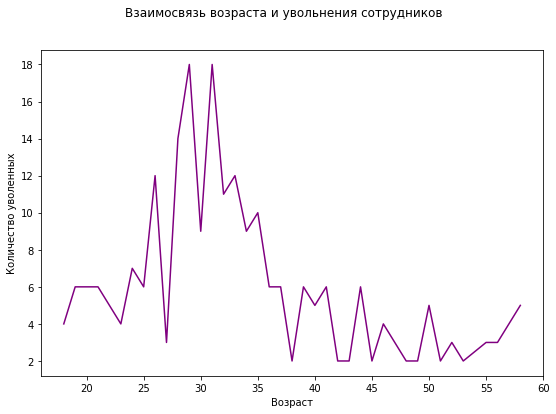

In [18]:
plt.figure(figsize=(9, 6))
plt.plot(np.unique(data[data['Attrition']=='Yes'].Age), list(data[data['Attrition']=='Yes'].groupby('Age')['Attrition'].count()), 'purple')
plt.xlabel('Возраст')
plt.ylabel('Количество уволенных')
plt.suptitle('Взаимосвязь возраста и увольнения сотрудников')

In [19]:
data[data['Attrition']=='Yes'].groupby(['Department'])[['Attrition']].count() # количество уволенных по департаментам


,Attrition
Department,
Human Resources,12
Research & Development,133
Sales,92


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

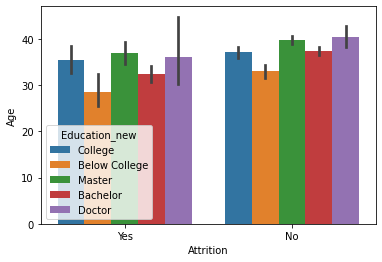

In [20]:
sns.barplot(x="Attrition", y="Age",  hue="Education_new",data=data) # количество уволенных по образованию

Text(0.5, 0.98, 'Взаимосвязь количества мест работы сотрудника и его увольнением с компании')

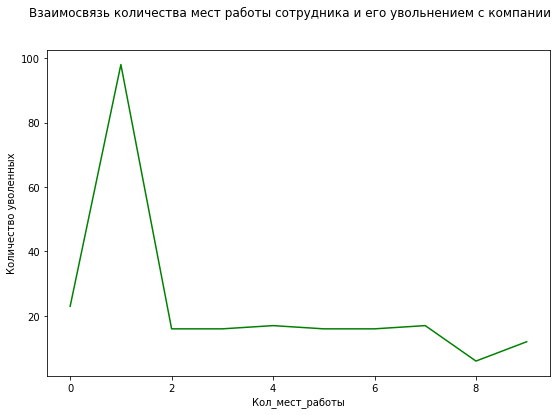

In [21]:
plt.figure(figsize=(9, 6))
plt.plot(np.unique(data.NumCompaniesWorked), list(data[data['Attrition']=='Yes'].groupby('NumCompaniesWorked')['Attrition'].count()), 'green')
plt.xlabel('Кол_мест_работы')
plt.ylabel('Количество уволенных')
plt.suptitle('Взаимосвязь количества мест работы сотрудника и его увольнением с компании')

In [22]:
data[data['Attrition']=='Yes'].groupby(['YearsAtCompany'])[['Attrition']].count().sort_values(by='Attrition', ascending = False).head(5)

,Attrition
YearsAtCompany,
1,59
2,27
5,21
3,20
4,19


Выводы:
- Возраст увольняемых сотрудников обычно 28 или 33 года;
- Взаимосвязь между увольнением сотрудника и полом, образованием, отделом отсутствует;
- Большего всего увольняются сотрудники ранее работавшие только в одной компании;
- Большая вероятность увольнения сотрудника проработавшего 1 год.

## 3. Анализ данных согласно ТЗ от компании <a id="E"></a>

3.1 Насколько сотрудники удовлетворены работой в компании и какие факторы влияют на удовлетворенность

In [23]:
data.EnvironmentSatisfaction.value_counts(1)# около 19 % сотрудников полностью не удовлетворены работой (1)

3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name: EnvironmentSatisfaction, dtype: float64

In [24]:
data[data['EnvironmentSatisfaction']==1].groupby(['EducationField','EnvironmentSatisfaction'])[['EnvironmentSatisfaction']].count()
# больше всего не удовлетворены работой сотрудники в сфере образованием "Life Sciences" и "Medical"

,,EnvironmentSatisfaction
EducationField,EnvironmentSatisfaction,
Human Resources,1,5
Life Sciences,1,130
Marketing,1,29
Medical,1,87
Other,1,10
Technical Degree,1,23


In [25]:
data[(data['EducationField'].isin(['Life Sciences','Medical'])) & (data['EnvironmentSatisfaction']==1)].groupby(['Department','JobRole'])['EducationField'].count()
# больше всего не удовлетворены работой сотрудники в сфере образованием "Life Sciences" и "Medical" в департаменте Research & Development в должности Laboratory Technician, Research Scientist

Department              JobRole                  
Human Resources         Human Resources               3
                        Manager                       1
Research & Development  Healthcare Representative    17
                        Laboratory Technician        47
                        Manager                       9
                        Manufacturing Director       20
                        Research Director            20
                        Research Scientist           52
Sales                   Manager                       4
                        Sales Executive              38
                        Sales Representative          6
Name: EducationField, dtype: int64

In [26]:
data[(data['JobRole'].isin(['Laboratory Technician','Research Scientist'])) & (data['EnvironmentSatisfaction']==1)].groupby(['Department','JobRole'])[['MonthlyIncome']].mean()

MonthlyIncome
Department             JobRole                             
Research & Development Laboratory Technician    3559.056604
                       Research Scientist       3043.762712

In [27]:
data[data['Department']=='Research & Development'][['MonthlyIncome']].mean() # средняя зарплата в департаменте Research & Development

MonthlyIncome    6281.252862
dtype: float64

Около 19 % сотрудников не удовлетворены работой в компании. Больше всего не удовлетворены работой в компании сотрудники в сфере образованием "Life Sciences" и "Medical" в департаменте Research & Development в должности Laboratory Technician и Research Scientist их средняя зарплата состовляет 3559.05 и 3043.76 долл. США, при это средняя зарплата в департаменте Research & Development состовляет 6281.25 долл. США.

3.2 Как отношения на работе (RelationshipSatisfaction) зависят от подразделения и EnvironmentSatisfaction

In [28]:
data[(data['EnvironmentSatisfaction']==1) & (data['RelationshipSatisfaction']==1)].groupby(['Department'])[['RelationshipSatisfaction','EnvironmentSatisfaction']].count()

,RelationshipSatisfaction,EnvironmentSatisfaction
Department,,
Human Resources,1,1
Research & Development,40,40
Sales,17,17


Установлена прямая взаимосвязь между удовлетворенностью работой в компании и удовлетворенностью отношением в компании. Наиболее плохие оценки по удовлетворенности в департаменте Research & Development      

3.3 Как позиция(JobLevel)/доход и подразделение влияют на WorkLifeBalance

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='JobLevel'>

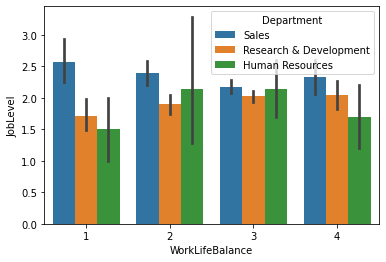

In [29]:
sns.barplot(x="WorkLifeBalance", y="JobLevel",  hue="Department",data=data)

Установлена не явная связь WorkLifeBalance и JobLevel. В 3-х департаментах при WorkLifeBalance = Better(3) средний уровень JobLevel почти одинаковый (около 2-x). Однако если смотреть на департамент Research & Development при одинаковом среднем показателе JobLevel WorkLifeBalance варьируется от Bad(1) до Best(4) 

Text(0.5, 0.98, 'Взаимосвязь WorkLifeBalance и средней_зарплаты')

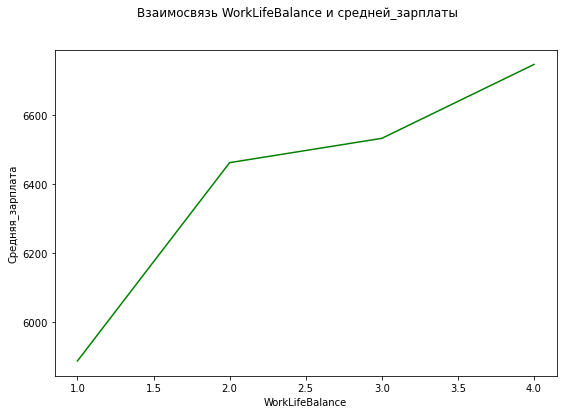

In [30]:
plt.figure(figsize=(9, 6))
plt.plot(np.unique(data.WorkLifeBalance), list(data.groupby('WorkLifeBalance')['MonthlyIncome'].mean()), 'green')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Cредняя_зарплата')
plt.suptitle('Взаимосвязь WorkLifeBalance и средней_зарплаты')

Чем больше уровень дохода тем выше WorkLifeBalance

3.4 Как вообще различается удовлетворенность в разных подразделениях? А в грейдах?

In [31]:
columns_to_show = ["EnvironmentSatisfaction", "JobLevel"]

data.groupby(["Department"])[columns_to_show].agg([np.mean])

,EnvironmentSatisfaction,JobLevel
,mean,mean
Department,,
Human Resources,2.682540,2.031746
Research & Development,2.744017,1.977107
Sales,2.679372,2.255605


### При анализе средних показателей EnvironmentSatisfaction и JobLevel установлено, что наиболее плохой показатель EnvironmentSatisfaction у департамента Sales, а у департамента Research & Development JobLevel

Выводы:
- Около 19 % сотрудников полностью не удовлетворены работой в компании;
- Факторы влияющие на удовлетворенность: сфера образования, должность, департамент, средняя зарплата ;
- Явная связь WorkLifeBalance и JobLevel не прослеживается, при этом чем больше уровень дохода тем выше WorkLifeBalance;
- При анализе средних показателей EnvironmentSatisfaction и JobLevel установлено, что наиболее плохой показатель EnvironmentSatisfaction у департамента Sales, а у департамента Research & Development показатель JobLevel